# Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Preparing the Dataset

In [38]:
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

In [39]:
print(wine_quality.data.features.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [40]:
print(wine_quality.metadata)
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

# Display the Dataset information

In [41]:
df = pd.concat([X, y], axis=1)
df.rename(columns={df.columns[-1]: 'quality'}, inplace=True)

def wine_data(df):
    print("Dataset Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nFirst few rows:")
    print(df.head())
    print("\nBasic Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

wine_data(df)
    

Dataset Shape: (6497, 12)

Columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

First few rows:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

# Visualization of distribution of features

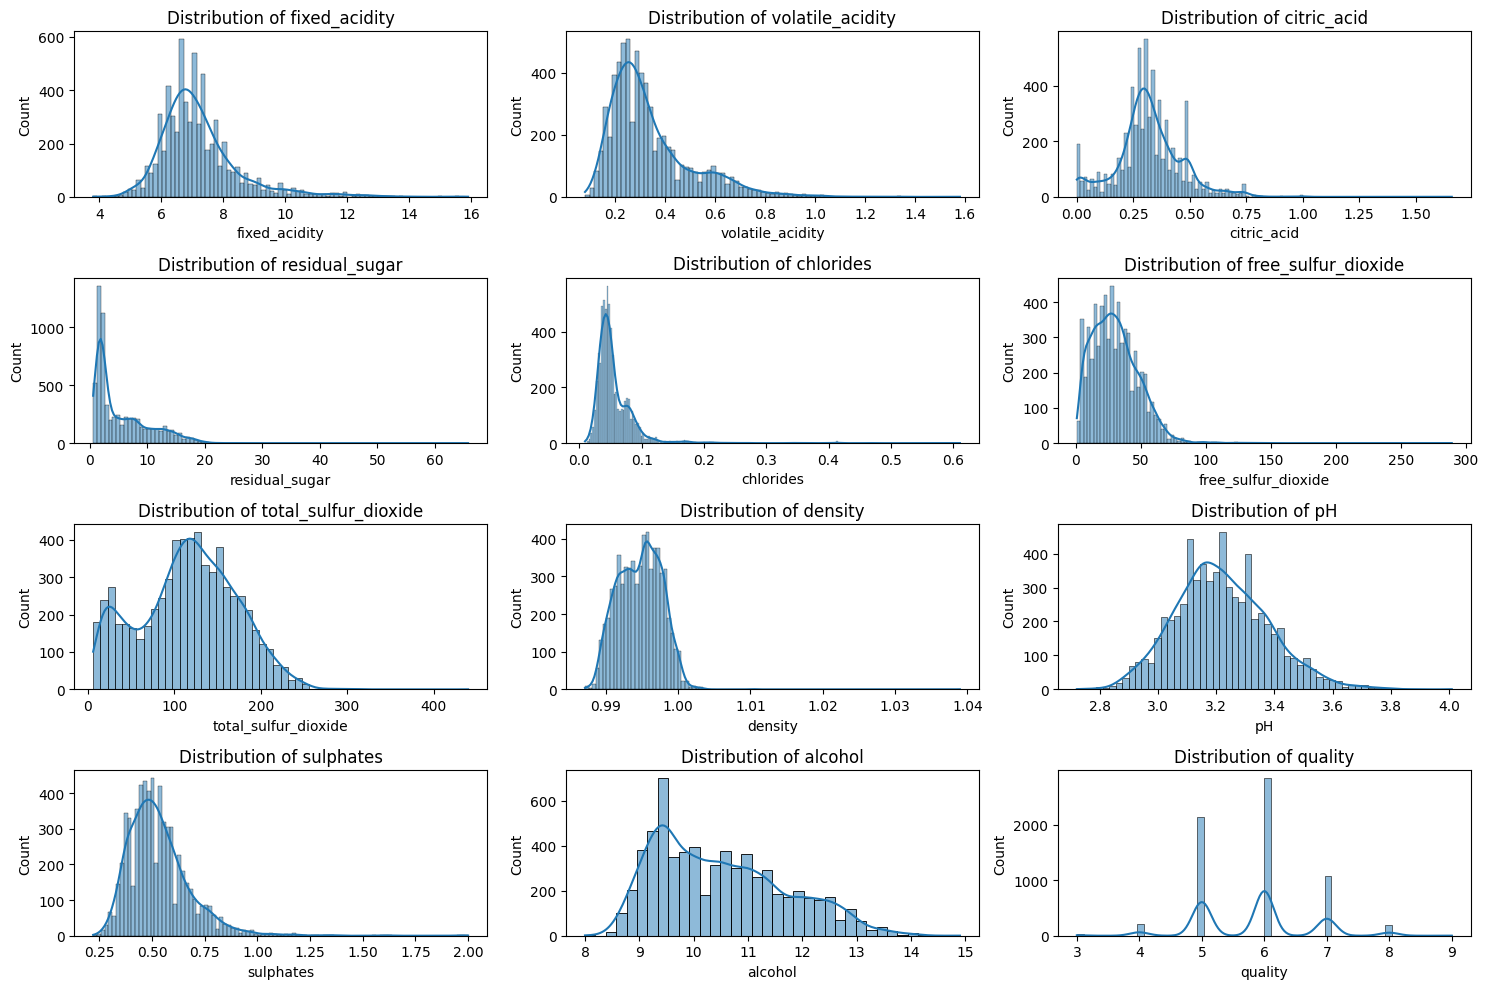

In [42]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Extracting the data and targets

In [43]:
X = wine_quality.data.features[['density', 'alcohol']].values.reshape(-1, 2)  
Y = wine_quality.data.targets

# Splitting and Training of Data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Predicting and Evaluating

In [46]:
r2_score = model.score(X_test, y_test)

In [47]:
x_pred = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
y_pred = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

predicted = model.predict(model_viz)


# Visualization of 3D

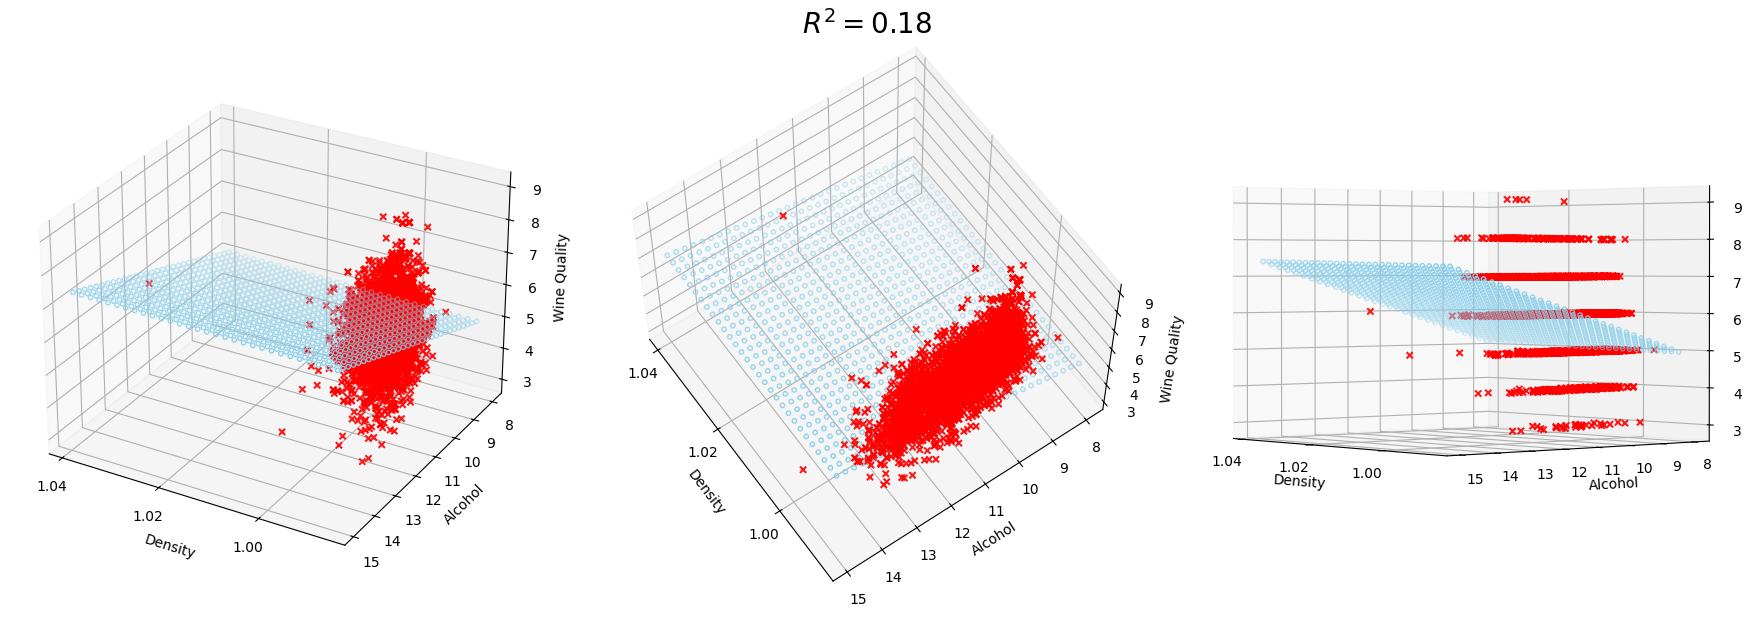

In [48]:
plt.style.use('default')

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(X[:, 0], X[:, 1], Y, color='red', marker='x', alpha=0.9)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, edgecolor='skyblue', s=10, facecolors='none')
    ax.set_xlabel('Density', fontsize=10)
    ax.set_ylabel('Alcohol', fontsize=10)
    ax.set_zlabel('Wine Quality', fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


# Setting view angles for each plot
ax1.view_init(elev=28, azim=120)
ax3.view_init(elev=1, azim=140)
ax2.view_init(elev=60, azim=145)

fig.suptitle('$R^2 = %.2f$' % r2_score, fontsize=20)

fig.tight_layout()
plt.show()

In [49]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("R^2 Score on Test Data:", r2_score)


Model Coefficients: [[2.52043253 0.33432381]]
Model Intercept: [-0.1974605]
R^2 Score on Test Data: 0.18115070969722857
